In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from tabulate import _table_formats, tabulate

In [2]:
datas = '/Users/pkrok/OneDrive/Python/Giannakopoulos/MyData.xlsx'

In [3]:
pd.set_option("display.max_columns", None)
df=pd.read_excel(datas)
df.head(2)
#df = df.dropna()

,type,cell,aperture,aperture2,ExpansionRatio,M-N,Μ-N_lff,Μ-N_kFF,ionicRad,MetalCharge,apertureAtom_charge,apertureAtom_σ,apertureAtom_e,linker_length1,linker_length2,linker_length3,linker_mass1,linker_mass2,linker_mass3,func1_length,func2_length,func3_length,func1_mass,func2_mass,func3_mass,func1_charge,func2_charge,func3_charge,gas,mass,Dbulk,ascentricF,size - van der Waals (Å),size - kinetic diameter (Å),diffusivity,solubility,permeability,Unnamed: 37,Unnamed: 38,Unnamed: 39,aperture2.1,Dresults,number of modifications
0,CdIF-1,1.8077,3.92,3.93,1.002551,2.18,2.257,45354.6,92,1.1901,NaN,0.25,0.0627,4.438,4.438,4.438,81.0,81.0,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001,He,4.002,0.000121,-0.390,2.66,2.60,6.000000e-08,NaN,NaN,NaN,NaN,NaN,637.0,554.0,72.0
1,CdIF-1,1.8077,3.92,NaN,0.000000,2.18,2.257,45354.6,92,1.1901,NaN,0.25,0.0627,4.438,4.438,4.438,81.0,81.0,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001,H2,2.010,0.000108,-0.217,3.13,2.89,1.700000e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Keep only the columns I need

In [4]:
df=df[['type', 'aperture', 'aperture2', 'ionicRad', 'linker_length1', 'linker_length2', 'linker_length3', 'func1_length', 'func2_length', 'func3_length', 'func1_mass', 'func2_mass', 'func3_mass', 'apertureAtom_σ', 'apertureAtom_e', 'linker_mass1', 'linker_mass2', 'linker_mass3', 'size - van der Waals (Å)', 'size - kinetic diameter (Å)', 'mass', 'ascentricF'  ]]
df = df.dropna()
df

,type,aperture,aperture2,ionicRad,linker_length1,linker_length2,linker_length3,func1_length,func2_length,func3_length,func1_mass,func2_mass,func3_mass,apertureAtom_σ,apertureAtom_e,linker_mass1,linker_mass2,linker_mass3,size - van der Waals (Å),size - kinetic diameter (Å),mass,ascentricF
0,CdIF-1,3.92,3.93000,92,4.438,4.438,4.438,3.78,3.78,3.78,15.0,15.0,15.0,0.25,0.0627,81.000,81.000,81.000,2.66,2.6,4.002,-0.390
3,CdIF-1,3.92,3.97000,92,4.438,4.438,4.438,3.78,3.78,3.78,15.0,15.0,15.0,0.25,0.0627,81.000,81.000,81.000,3.24,3.3,44.010,0.225
5,CdIF-1,3.92,4.08000,92,4.438,4.438,4.438,3.78,3.78,3.78,15.0,15.0,15.0,0.25,0.0627,81.000,81.000,81.000,3.25,3.8,16.040,0.011
6,CdIF-1,3.92,4.11000,92,4.438,4.438,4.438,3.78,3.78,3.78,15.0,15.0,15.0,0.25,0.0627,81.000,81.000,81.000,3.59,3.9,28.050,0.087
7,CdIF-1,3.92,4.11000,92,4.438,4.438,4.438,3.78,3.78,3.78,15.0,15.0,15.0,0.25,0.0627,81.000,81.000,81.000,3.72,4.0,30.070,0.099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,dIm_Mg,2.95,3.06987,71,6.410,6.410,6.410,3.78,3.78,3.78,15.0,15.0,15.0,0.34,1.2552,134.906,134.906,134.906,3.25,3.8,16.040,0.011
847,dIm_Mg,2.95,3.07875,71,6.410,6.410,6.410,3.78,3.78,3.78,15.0,15.0,15.0,0.34,1.2552,134.906,134.906,134.906,3.59,3.9,28.050,0.087
848,dIm_Mg,2.95,3.08837,71,6.410,6.410,6.410,3.78,3.78,3.78,15.0,15.0,15.0,0.34,1.2552,134.906,134.906,134.906,3.72,4.0,30.070,0.099
849,dIm_Mg,2.95,3.12791,71,6.410,6.410,6.410,3.78,3.78,3.78,15.0,15.0,15.0,0.34,1.2552,134.906,134.906,134.906,4.03,4.5,42.080,0.142


# Bring my data into shape

In [5]:
# df2=df.drop_duplicates(subset=['type'], keep='first')
# df2

In [6]:
df=df.rename(columns={'linker_length3':'linker3', 'func3_length':'func3G', 'linker_length2':'linker2', 'func2_length':'func2G', 'linker_length1':'linker1', 'func1_length':'func1G', 'apertureAtom_σ':'σ', 'apertureAtom_e':'e', 'linker_mass1.1':'linker_mass2', 'size - van der Waals (Å)':'vdW', 'size - kinetic diameter (Å)':'kinDiam' })

# I sort my data

In [7]:
df=df.sort_values(by = ['linker1', 'func1G', 'ionicRad'], ascending = True)
#df3.reset_index(drop=True)
df.head()

,type,aperture,aperture2,ionicRad,linker1,linker2,linker3,func1G,func2G,func3G,func1_mass,func2_mass,func3_mass,σ,e,linker_mass1,linker_mass2,linker_mass3,vdW,kinDiam,mass,ascentricF
265,tetr-ZIF8_Be,3.39,3.400,41,3.66,3.66,3.66,3.78,3.78,3.78,15.0,15.0,15.0,0.325,0.7112,83.0,83.0,83.0,2.66,2.60,4.002,-0.390
266,tetr-ZIF8_Be,3.39,3.410,41,3.66,3.66,3.66,3.78,3.78,3.78,15.0,15.0,15.0,0.325,0.7112,83.0,83.0,83.0,3.13,2.89,2.010,-0.217
267,tetr-ZIF8_Be,3.39,3.430,41,3.66,3.66,3.66,3.78,3.78,3.78,15.0,15.0,15.0,0.325,0.7112,83.0,83.0,83.0,2.94,3.46,31.999,0.022
268,tetr-ZIF8_Be,3.39,3.390,41,3.66,3.66,3.66,3.78,3.78,3.78,15.0,15.0,15.0,0.325,0.7112,83.0,83.0,83.0,3.24,3.30,44.010,0.225
269,tetr-ZIF8_Be,3.39,3.433,41,3.66,3.66,3.66,3.78,3.78,3.78,15.0,15.0,15.0,0.325,0.7112,83.0,83.0,83.0,3.13,3.64,28.000,0.037


In [8]:
df=df.reset_index(drop=True)
df.head()

,type,aperture,aperture2,ionicRad,linker1,linker2,linker3,func1G,func2G,func3G,func1_mass,func2_mass,func3_mass,σ,e,linker_mass1,linker_mass2,linker_mass3,vdW,kinDiam,mass,ascentricF
0,tetr-ZIF8_Be,3.39,3.400,41,3.66,3.66,3.66,3.78,3.78,3.78,15.0,15.0,15.0,0.325,0.7112,83.0,83.0,83.0,2.66,2.60,4.002,-0.390
1,tetr-ZIF8_Be,3.39,3.410,41,3.66,3.66,3.66,3.78,3.78,3.78,15.0,15.0,15.0,0.325,0.7112,83.0,83.0,83.0,3.13,2.89,2.010,-0.217
2,tetr-ZIF8_Be,3.39,3.430,41,3.66,3.66,3.66,3.78,3.78,3.78,15.0,15.0,15.0,0.325,0.7112,83.0,83.0,83.0,2.94,3.46,31.999,0.022
3,tetr-ZIF8_Be,3.39,3.390,41,3.66,3.66,3.66,3.78,3.78,3.78,15.0,15.0,15.0,0.325,0.7112,83.0,83.0,83.0,3.24,3.30,44.010,0.225
4,tetr-ZIF8_Be,3.39,3.433,41,3.66,3.66,3.66,3.78,3.78,3.78,15.0,15.0,15.0,0.325,0.7112,83.0,83.0,83.0,3.13,3.64,28.000,0.037


# Multiple Regression Model

## split with random.rand

In [9]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [10]:
df.columns

Index(['type', 'aperture', 'aperture2', 'ionicRad', 'linker1', 'linker2',
       'linker3', 'func1G', 'func2G', 'func3G', 'func1_mass', 'func2_mass',
       'func3_mass', 'σ', 'e', 'linker_mass1', 'linker_mass2', 'linker_mass3',
       'vdW', 'kinDiam', 'mass', 'ascentricF'],
      dtype='object')

In [11]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ionicRad', 'aperture', 'linker1', 'linker2', 'linker3', 'linker_mass1', 'linker_mass2', 'linker_mass3', 'func1G', 'func2G', 'func3G', 'func1_mass', 'func2_mass', 'func3_mass', 'σ', 'e', 'vdW', 'kinDiam', 'mass', 'ascentricF']])
y = np.asanyarray(train[['aperture2']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 1.13044304e-03  8.13066293e-01 -8.44686051e-03 -8.44686051e-03
  -7.43594806e-03 -7.29045734e-03 -7.29045734e-03  1.60682384e-02
  -4.40057948e-02 -4.31005773e-02 -2.92425435e-02 -3.89037767e-03
   4.54706943e-03 -9.03304030e-05  1.06193605e+00 -2.42332920e-01
   1.64264828e-01  2.08054828e-01 -2.68833850e-03  1.26443476e-01]]


In [12]:
y_hat= regr.predict(test[['ionicRad', 'aperture', 'linker1', 'linker2', 'linker3', 'linker_mass1', 'linker_mass2', 'linker_mass3', 'func1G', 'func2G', 'func3G', 'func1_mass', 'func2_mass', 'func3_mass', 'σ', 'e', 'vdW', 'kinDiam', 'mass', 'ascentricF']])
x = np.asanyarray(test[['ionicRad', 'aperture', 'linker1', 'linker2', 'linker3', 'linker_mass1', 'linker_mass2', 'linker_mass3', 'func1G', 'func2G', 'func3G', 'func1_mass', 'func2_mass', 'func3_mass', 'σ', 'e', 'vdW', 'kinDiam', 'mass', 'ascentricF']])
y = np.asanyarray(test[['aperture2']])
print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))
print('Explained variance: %.2f' % explained_variance_score(y, y_hat))

Residual sum of squares: 0.02
Variance score: 0.85
Explained variance: 0.86


In [13]:
print(regr.coef_)

[[ 1.13044304e-03  8.13066293e-01 -8.44686051e-03 -8.44686051e-03
  -7.43594806e-03 -7.29045734e-03 -7.29045734e-03  1.60682384e-02
  -4.40057948e-02 -4.31005773e-02 -2.92425435e-02 -3.89037767e-03
   4.54706943e-03 -9.03304030e-05  1.06193605e+00 -2.42332920e-01
   1.64264828e-01  2.08054828e-01 -2.68833850e-03  1.26443476e-01]]


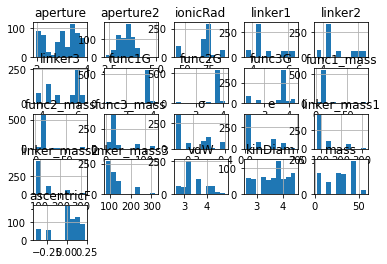

In [14]:
df.hist()
plt.show()

## split with train_test_split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=None)

In [17]:
regr.fit (x_train, y_train)
print('Coefficients: ', regr.coef_)

Coefficients:  [[-3.12329767e-03  1.04464458e+00  1.84373257e-02  1.84373257e-02
   1.99878277e-02 -1.16676445e-02 -1.16676445e-02  2.41591030e-02
  -3.36035131e-02 -3.31094515e-02  8.64117052e-03 -2.00964739e-03
   2.59545418e-03 -1.54771062e-03  4.98075798e-02 -1.56339999e-01
   3.77140977e-02  2.59113264e-01 -2.47605648e-03  7.37509911e-04]]


In [18]:
y_hat=regr.predict(x_test)

print("Residual sum of squares: %.2f" % np.mean((y_hat - y_test) ** 2))
print('Variance score: %.2f' % regr.score(x_test, y_test))

Residual sum of squares: 0.04
Variance score: 0.78


# With repeated splits

In [19]:
x = np.asanyarray(df[['ionicRad', 'aperture', 'linker1', 'linker2', 'linker3', 'linker_mass1', 'linker_mass2', 'linker_mass3', 'func1G', 'func2G', 'func3G', 'func1_mass', 'func2_mass', 'func3_mass', 'σ', 'e', 'vdW', 'kinDiam', 'mass', 'ascentricF']])
y = np.asanyarray(df[['aperture2']])

## K-fold Cross-Validation

In [20]:
from sklearn.model_selection import KFold

## Decision Tree Regressor with K-fold Cross-Validation

In [21]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(random_state=0)
from sklearn import metrics

In [22]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(random_state=0)

# k-fold cross validation
data_y, data_yhat = list(), list()
kfold = KFold(n_splits=10, shuffle=True)
# enumerate splits
for train_ix, test_ix in kfold.split(x):
	# get data
	train_X, test_X = x[train_ix], x[test_ix]
	train_y, test_y = y[train_ix], y[test_ix]
	# fit model
	tree.fit(train_X, train_y)
	# make predictions
	yhat = tree.predict(test_X)
	# store
	data_y.extend(test_y)
	data_yhat.extend(yhat)
# evaluate the model
#acc = accuracy_score(data_y, data_yhat)
metrics.r2_score(data_y, data_yhat)
print('R2: %.4f' % (metrics.r2_score(data_y, data_yhat)))

R2: 0.9700


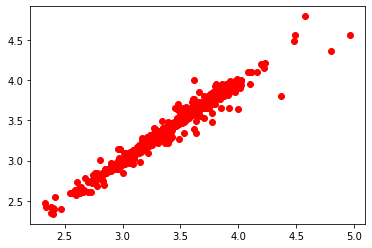

In [23]:
plt.plot(data_y, data_yhat, 'ro', label='DT regression')
plt.show()

In [24]:
dfMetrics = pd.DataFrame(columns = ['data', 'testPerf', 'trainPerf'])

tree=DecisionTreeRegressor(random_state=0)
regr = linear_model.LinearRegression()

# save lists
testList = list()
trainList = list()

kfold = KFold(n_splits=10, shuffle=True, random_state = None)

for i in range(600):
    data_y1 = list()
    data_y2 = list()
    data_predTrain = list()
    data_predTest = list()

    i=i+10
    a=i

    df2=df.iloc[0:i, :]
    x = np.asanyarray(df2[['ionicRad', 'aperture', 'linker1', 'linker2', 'linker3', 'linker_mass1', 'linker_mass2', 'linker_mass3', 'func1G', 'func2G', 'func3G', 'func1_mass', 'func2_mass', 'func3_mass', 'σ', 'e', 'vdW', 'kinDiam', 'mass', 'ascentricF']])
    y = np.asanyarray(df2[['aperture2']])

    # enumerate splits
    for train_ix, test_ix in kfold.split(x):
        # get data
        train_X, test_X = x[train_ix], x[test_ix]
        train_y, test_y = y[train_ix], y[test_ix]
        # fit model
        tree.fit(train_X, train_y)
        # make predictions
        pred_test = tree.predict(test_X)
        pred_train = tree.predict(train_X)
        
        #store
        data_y1.extend(test_y)
        data_y2.extend(train_y)
        data_predTrain.extend(pred_train)
        data_predTest.extend(pred_test)
        
    # evaluate
    R2_test = (metrics.r2_score(data_y1,data_predTest))
    R2_train = (metrics.r2_score(data_y2,data_predTrain))
    dfMetrics.loc[i, 'testPerf'] = R2_test
    dfMetrics.loc[i, 'trainPerf'] = R2_train
    dfMetrics.loc[i, 'data'] = a


In [25]:
dfMetrics

,data,testPerf,trainPerf
10,10,0.738127,1.0
11,11,0.72063,1.0
12,12,-0.381317,1.0
13,13,0.799292,1.0
14,14,0.855549,1.0
...,...,...,...
605,605,0.970189,1.0
606,606,0.966954,1.0
607,607,0.971803,1.0
608,608,0.966138,1.0


<AxesSubplot:xlabel='data', ylabel='trainPerf'>

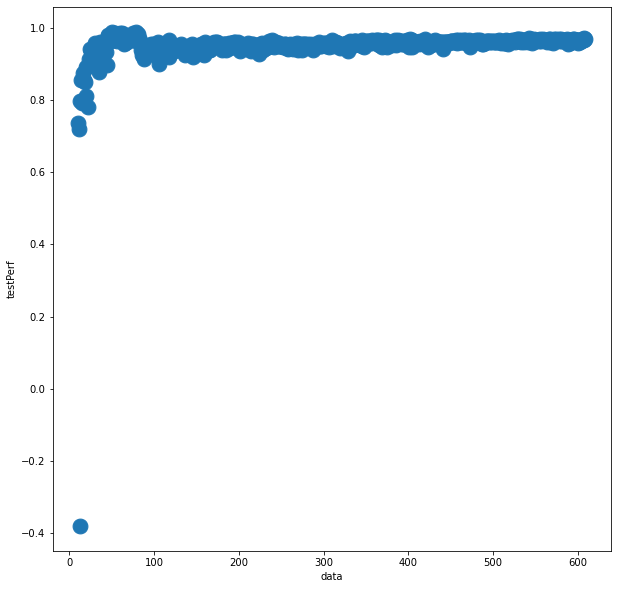

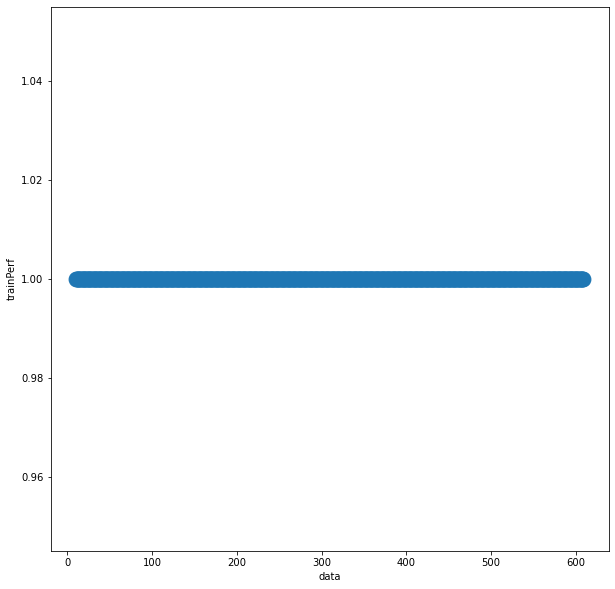

In [26]:
dfMetrics.plot(kind='scatter', x='data', y='testPerf',s=220, figsize=(10, 10))
dfMetrics.plot(kind='scatter', x='data', y='trainPerf',s=220, figsize=(10, 10))

In [27]:
dfMetrics = pd.DataFrame(columns = ['data', 'testPerf', 'trainPerf'])

tree=DecisionTreeRegressor(random_state=0, max_depth=6)
regr = linear_model.LinearRegression()

# save lists
testList = list()
trainList = list()

k=0

# kfold = KFold(n_splits=5, shuffle=True, random_state = None)

for i in range(60):
    data_y1 = list()
    data_y2 = list()
    data_predTrain = list()
    data_predTest = list()

    k=10*(i+1)+5
    
    kfold = KFold(n_splits=5, shuffle=True, random_state = None)
    
    df2=df.iloc[0:k, :]
    x = np.asanyarray(df2[['ionicRad', 'aperture', 'linker1', 'linker2', 'linker3', 'linker_mass1', 'linker_mass2', 'linker_mass3', 'func1G', 'func2G', 'func3G', 'func1_mass', 'func2_mass', 'func3_mass', 'σ', 'e', 'vdW', 'kinDiam', 'mass', 'ascentricF']])
    y = np.asanyarray(df2[['aperture2']])

    # enumerate splits
    for train_ix, test_ix in kfold.split(x):
        # get data
        train_X, test_X = x[train_ix], x[test_ix]
        train_y, test_y = y[train_ix], y[test_ix]
        # fit model
        tree.fit(train_X, train_y)
        # make predictions
        pred_test = tree.predict(test_X)
        pred_train = tree.predict(train_X)
        
        
        #store
        data_y1.extend(test_y)
        data_y2.extend(train_y)
        data_predTrain.extend(pred_train)
        data_predTest.extend(pred_test)
        
    # evaluate
    R2_test = (metrics.r2_score(data_y1,data_predTest))
    R2_train = (metrics.r2_score(data_y2,data_predTrain))
    dfMetrics.loc[i, 'testPerf'] = R2_test
    dfMetrics.loc[i, 'trainPerf'] = R2_train
    dfMetrics.loc[i, 'data'] = k


In [28]:
dfMetrics.head()

,data,testPerf,trainPerf
0,15,0.844728,1.0
1,25,0.842906,0.999971
2,35,0.954593,0.999847
3,45,0.971284,0.999864
4,55,0.981827,0.99991


<AxesSubplot:xlabel='data', ylabel='testPerf'>

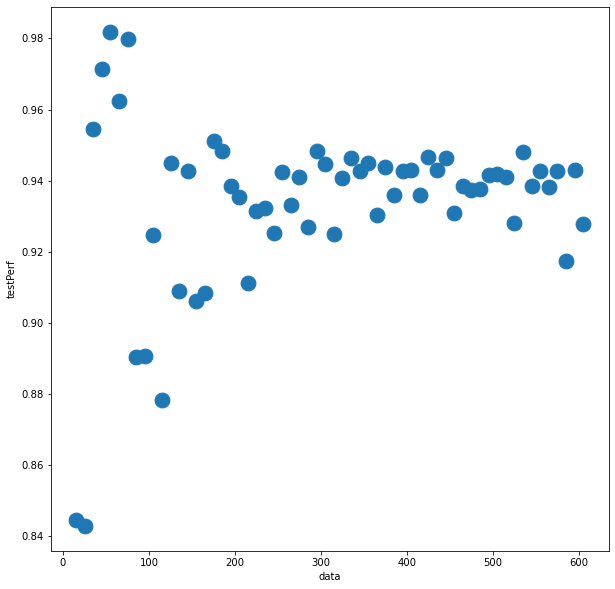

In [29]:
dfMetrics.plot(kind='scatter', x='data', y='testPerf',s=220, figsize=(10, 10))

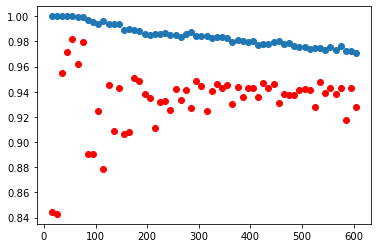

In [30]:
AxX=dfMetrics['data']
AxY=dfMetrics['testPerf']
AxY2=dfMetrics['trainPerf']
plt.plot(AxX, AxY, 'ro', label='DT regression')
plt.plot(AxX, AxY2, 'o', label='DT regression')

In [31]:
dfMetrics = pd.DataFrame(columns = ['data', 'testPerf', 'trainPerf'])

tree=DecisionTreeRegressor(random_state=0, max_depth=5)
regr = linear_model.LinearRegression()

# save lists
testList = list()
trainList = list()

k=0

# kfold = KFold(n_splits=5, shuffle=True, random_state = None)

for i in range(600):
#for i in range(0, len(df)):
    data_y1 = list()
    data_y2 = list()
    data_predTrain = list()
    data_predTest = list()

    #k=10*(i+1)+5
    i=i+1
    
    df2=df.iloc[0:i, 0:]

    x = np.asanyarray(df2[['ionicRad', 'aperture', 'linker1', 'linker2', 'linker3', 'linker_mass1', 'linker_mass2', 'linker_mass3', 'func1G', 'func2G', 'func3G', 'func1_mass', 'func2_mass', 'func3_mass', 'σ', 'e', 'vdW', 'kinDiam', 'mass', 'ascentricF']])
    y = np.asanyarray(df2[['aperture2']])

    testdf=df.iloc[600:630, 0:]
    
    testx = np.asanyarray(testdf[['ionicRad', 'aperture', 'linker1', 'linker2', 'linker3', 'linker_mass1', 'linker_mass2', 'linker_mass3', 'func1G', 'func2G', 'func3G', 'func1_mass', 'func2_mass', 'func3_mass', 'σ', 'e', 'vdW', 'kinDiam', 'mass', 'ascentricF']])
    testy = np.asanyarray(testdf[['aperture2']])   
    
    tree.fit(x, y)
    
    pred_test = tree.predict(testx)
    pred_train = tree.predict(x)
    
        
    # evaluate
    R2_test = (metrics.r2_score(testy,pred_test))
    R2_train = (metrics.r2_score(y,pred_train))
    dfMetrics.loc[i, 'testPerf'] = R2_test
    dfMetrics.loc[i, 'trainPerf'] = R2_train
    dfMetrics.loc[i, 'data'] = i

C:\Users\pkrok\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [32]:
dfMetrics[50:70]

,data,testPerf,trainPerf
51,51,-75.441519,0.99894
52,52,-75.441519,0.998968
53,53,-75.441519,0.998994
54,54,-75.447171,0.998914
55,55,-75.447171,0.998906
56,56,-35.090147,0.998886
57,57,-35.090147,0.998871
58,58,-75.447143,0.998859
59,59,-35.090147,0.998312
60,60,-71.568412,0.998787


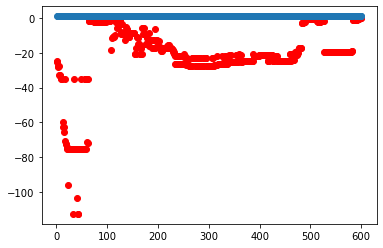

In [33]:
AxX=dfMetrics['data']
AxY=dfMetrics['testPerf']
AxY2=dfMetrics['trainPerf']
plt.plot(AxX, AxY, 'ro', label='DT regression')
plt.plot(AxX, AxY2, 'o', label='DT regression')

In [61]:
dfMetrics = pd.DataFrame(columns = ['data', 'testPerf', 'trainPerf', 'testMSE', 'trainMSE'])

tree=DecisionTreeRegressor(random_state=0, max_depth=6)
regr = linear_model.LinearRegression()

kfold = KFold(n_splits=40, shuffle=True, random_state = None)

#make the test set
testdf=df.iloc[600:, 0:]
    
testx = np.asanyarray(testdf[['ionicRad', 'aperture', 'linker1', 'linker2', 'linker3', 'linker_mass1', 'linker_mass2', 'linker_mass3', 'func1G', 'func2G', 'func3G', 'func1_mass', 'func2_mass', 'func3_mass', 'σ', 'e', 'vdW', 'kinDiam', 'mass', 'ascentricF']])
testy = np.asanyarray(testdf[['aperture2']])   

# save lists
testList = list()
trainList = list()
dataTrueTest = list()

i=0

# kfold = KFold(n_splits=5, shuffle=True, random_state = None)

for i in range(56, 560, 56):
    data_y1 = list()
    data_y2 = list()
    data_predTrain = list()
    data_predTest = list()
    
    df2=df.iloc[:i, :]
    x = np.asanyarray(df2[['ionicRad', 'aperture', 'linker1', 'linker2', 'linker3', 'linker_mass1', 'linker_mass2', 'linker_mass3', 'func1G', 'func2G', 'func3G', 'func1_mass', 'func2_mass', 'func3_mass', 'σ', 'e', 'vdW', 'kinDiam', 'mass', 'ascentricF']])
    y = np.asanyarray(df2[['aperture2']])

    # enumerate splits
    for train_ix, test_ix in kfold.split(x):
        # get data
        train_X, test_X = x[train_ix], x[test_ix]
        train_y, test_y = y[train_ix], y[test_ix]
        
        # fit model
        regr.fit(train_X, train_y)
       
        # make predictions

        pred_train = regr.predict(train_X)
                
        #store
#         data_y1.extend(test_y)
        data_y2.extend(train_y)
        data_predTrain.extend(pred_train)
        pred_test = regr.predict(testx)
        data_predTest.extend(pred_test)
        dataTrueTest.extend(testy)
        
    # evaluate
#     R2_test = (metrics.r2_score(testy,pred_test))
#     R2_train = (metrics.r2_score(data_y2,data_predTrain))
    MSE_test = (metrics.mean_squared_error(dataTrueTest,data_predTest))
    MSE_train = (metrics.mean_squared_error(data_y2,data_predTrain))
#    dfMetrics.loc[i, 'testPerf'] = R2_test
#    dfMetrics.loc[i, 'trainPerf'] = R2_train
    dfMetrics.loc[i, 'testMSE'] = MSE_test
    dfMetrics.loc[i, 'trainMSE'] = MSE_train    
    dfMetrics.loc[i, 'data'] = i

ValueError: Found input variables with inconsistent numbers of samples: [2960, 1480]

In [62]:
len(dataTrueTest)

2960

In [63]:
len(data_predTest)

1480

In [64]:
dfMetrics.tail(10)

,data,testPerf,trainPerf,testMSE,trainMSE
56,56,NaN,NaN,69188999229483106304.0,0.000469


<function matplotlib.pyplot.show(close=None, block=None)>

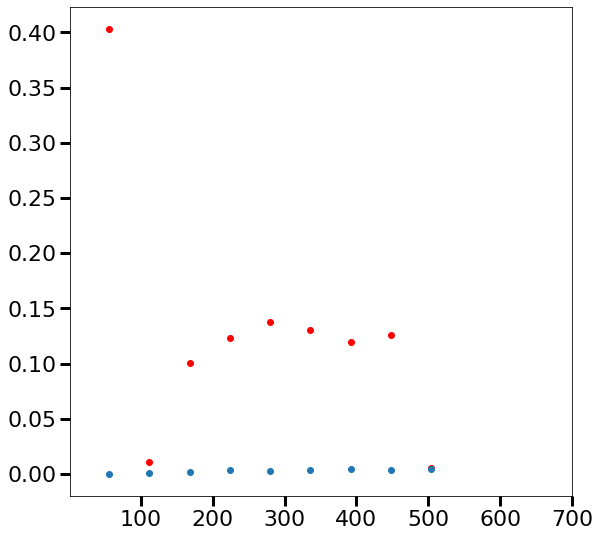

In [46]:
AxX=dfMetrics['data']
AxY=dfMetrics['testMSE']
AxY2=dfMetrics['trainMSE']
plt.plot(AxX, AxY, 'ro', label='DT regression')
plt.plot(AxX, AxY2, 'o', label='DT regression')

#plt.ylim(-1, 2)
plt.xlim(1, 700)
#plt.xscale('log')
plt.tick_params(which='both', width=3)
plt.tick_params(which='major', length=10)
plt.tick_params(which='minor', length=4, color='r')
plt.rcParams["figure.figsize"] = (9,9)
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)

plt.show

In [ ]:
# AxX=dfMetrics['data']
# AxY=dfMetrics['testMSE']
# AxY2=dfMetrics['trainMSE']
# plt.plot(AxX, AxY, 'ro', label='DT regression')
# plt.plot(AxX, AxY2, 'o', label='DT regression')

# # plt.ylim(-5, 1)
# # plt.xlim(10, 700)
# plt.show

In [ ]:
testdf.head(20)